In [1]:
# importing necessary datasets used in the project

import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
# reading the excel file

df = pd.read_excel('Killa.xlsx')
df

,First Name,Last Name,transaction
0,nooeukw,uuoaklowalb,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
1,angulbo,seagn,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
2,dukowi,eukloomja,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
3,ltuoawiob,uuilawobmn,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
4,nakuolo,donald,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
...,...,...,...
122,nodgeeul,ihcnek,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
123,dunoetsa,cteenaip,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
124,etst,mflioulna,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
125,asimeinfj,au nyiuflasalodmoelo,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."


In [3]:
df.shape

(127, 3)

### Que 1 - Straightening out the table of at least 7 columns

##### Cleaning the data

In [4]:
# converting/extracting the transaction column of dictionary data type into string of various columns columns

df2 = df['transaction'].map(eval)
df3 = pd.json_normalize(df2)
df3

,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[1992-11-10 00:00:00]
1,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,[n/a]
2,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,[1992-01-01 00:00:00]
3,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,[1981-01-07 00:00:00]
4,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[n/a]
...,...,...,...,...,...,...,...
122,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,[n/a]
123,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,[n/a]
124,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[n/a]
125,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,[n/a]


In [5]:
df3.shape

(127, 7)

In [6]:
df4 = pd.concat([df.drop('transaction',axis=1),df3],axis=1)
df4

,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[1992-11-10 00:00:00]
1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,[n/a]
2,dukowi,eukloomja,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,[1992-01-01 00:00:00]
3,ltuoawiob,uuilawobmn,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,[1981-01-07 00:00:00]
4,nakuolo,donald,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[n/a]
...,...,...,...,...,...,...,...,...,...
122,nodgeeul,ihcnek,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,[n/a]
123,dunoetsa,cteenaip,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,[n/a]
124,etst,mflioulna,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[n/a]
125,asimeinfj,au nyiuflasalodmoelo,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,[n/a]


In [7]:
df4.shape

(127, 9)

In [8]:
df4['dob'] = [','.join(map(str,l)) for l in df4.dob]
df4

,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10 00:00:00
1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,n/a
2,dukowi,eukloomja,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,1992-01-01 00:00:00
3,ltuoawiob,uuilawobmn,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,1981-01-07 00:00:00
4,nakuolo,donald,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,n/a
...,...,...,...,...,...,...,...,...,...
122,nodgeeul,ihcnek,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,n/a
123,dunoetsa,cteenaip,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,n/a
124,etst,mflioulna,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,n/a
125,asimeinfj,au nyiuflasalodmoelo,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,n/a


In [9]:
df4.isna().sum()

First Name    0
Last Name     0
tx_id         0
tx_date       0
tx_amount     0
tx_mode       0
tx_channel    0
bank_name     0
dob           0
dtype: int64

#### Data preprocessing/feature engineering

In [10]:
df4['dob'] = df4['dob'].replace('n/a',np.nan)
df4

,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10 00:00:00
1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,NaN
2,dukowi,eukloomja,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,1992-01-01 00:00:00
3,ltuoawiob,uuilawobmn,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,1981-01-07 00:00:00
4,nakuolo,donald,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,NaN
...,...,...,...,...,...,...,...,...,...
122,nodgeeul,ihcnek,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,NaN
123,dunoetsa,cteenaip,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,NaN
124,etst,mflioulna,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,NaN
125,asimeinfj,au nyiuflasalodmoelo,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,NaN


In [11]:
df4.isna().sum()

First Name     0
Last Name      0
tx_id          0
tx_date        0
tx_amount      0
tx_mode        0
tx_channel     0
bank_name      0
dob           82
dtype: int64

In [12]:
df4['dob_year_only'] = pd.DatetimeIndex(df4['dob']).year
df4

,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob,dob_year_only
0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10 00:00:00,1992.0
1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,NaN,NaN
2,dukowi,eukloomja,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,1992-01-01 00:00:00,1992.0
3,ltuoawiob,uuilawobmn,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,1981-01-07 00:00:00,1981.0
4,nakuolo,donald,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
122,nodgeeul,ihcnek,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,NaN,NaN
123,dunoetsa,cteenaip,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,NaN,NaN
124,etst,mflioulna,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,NaN,NaN
125,asimeinfj,au nyiuflasalodmoelo,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,NaN,NaN


In [13]:
# getting the age of customers from their 'dob'
present_year = datetime.now().year
df4['age'] = present_year - df4['dob_year_only']
df4['age'] = df4['age'].replace(np.nan,0)
df4

,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob,dob_year_only,age
0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10 00:00:00,1992.0,28.0
1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,NaN,NaN,0.0
2,dukowi,eukloomja,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,1992-01-01 00:00:00,1992.0,28.0
3,ltuoawiob,uuilawobmn,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,1981-01-07 00:00:00,1981.0,39.0
4,nakuolo,donald,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
122,nodgeeul,ihcnek,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,NaN,NaN,0.0
123,dunoetsa,cteenaip,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,NaN,NaN,0.0
124,etst,mflioulna,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,NaN,NaN,0.0
125,asimeinfj,au nyiuflasalodmoelo,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,NaN,NaN,0.0


In [14]:
df4['age'].unique()

array([28.,  0., 39., 40., 22., 44., 36., 31., 21., 41., 51., 45., 27.,
       32., 20., 26., 29., 53., 46., 33.])

In [15]:
df4.isna().sum()

First Name        0
Last Name         0
tx_id             0
tx_date           0
tx_amount         0
tx_mode           0
tx_channel        0
bank_name         0
dob              82
dob_year_only    82
age               0
dtype: int64

In [16]:
df4.columns

Index(['First Name', 'Last Name', 'tx_id', 'tx_date', 'tx_amount', 'tx_mode',
       'tx_channel', 'bank_name', 'dob', 'dob_year_only', 'age'],
      dtype='object')

In [17]:
df4.tx_mode.unique()

array(['Debit'], dtype=object)

Transaction mode has only one unique entry, this gives us little or no helpful information. We drop it

In [18]:
df5 = df4[['tx_amount','tx_channel', 'bank_name','age']]
df5

,tx_amount,tx_channel,bank_name,age
0,6192,web,QBank,28.0
1,38445,mobile,ABank,0.0
2,29627,mobile,GBank,28.0
3,27791,web,KBank,39.0
4,6192,web,QBank,0.0
...,...,...,...,...
122,29627,mobile,GBank,0.0
123,27791,web,KBank,0.0
124,6192,web,QBank,0.0
125,38445,mobile,ABank,0.0


### Que 2 - Identifying the top 5 predominant ages in the dataset

In [19]:
df5['age'].value_counts()

0.0     82
28.0     6
40.0     5
44.0     4
31.0     4
39.0     3
20.0     3
27.0     3
21.0     3
36.0     2
29.0     2
32.0     2
22.0     1
33.0     1
46.0     1
51.0     1
45.0     1
26.0     1
53.0     1
41.0     1
Name: age, dtype: int64

Ans - 28, 40, 44, 31 and 39 ages in this order

In [20]:
# df5.hist('age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B428048>]],
      dtype=object)

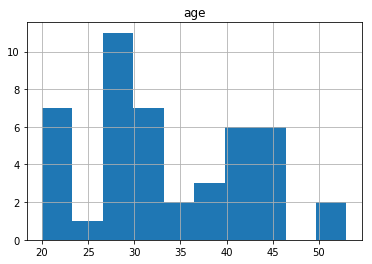

In [21]:
# Displaying histogram of ages greater than 0 yearsdf5[df5.age > 0].hist('age')

### Que 3 - Bank with the largest share of transaction

In [22]:
df5.groupby('bank_name')['tx_amount'].max()

bank_name
ABank    38445
GBank    29627
KBank    27791
QBank     6192
Name: tx_amount, dtype: int64

In [23]:
df5.groupby('bank_name')['tx_amount'].max()[0]

38445

Ans - 38445

In [24]:
# df5.groupby('bank_name').count()

In [25]:
# df5.groupby('bank_name')['tx_amount'].min()

### Que 4 - Distribution of channels used on transaction

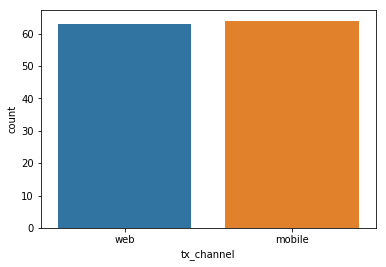

In [26]:
# plt.figure(figsize=(11,5))
sns.countplot('tx_channel',data=df5)

In [27]:
df5.groupby('tx_channel')['tx_amount','bank_name'].max()

C:\Users\Wey P\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,tx_amount,bank_name
tx_channel,,
mobile,38445,GBank
web,27791,QBank


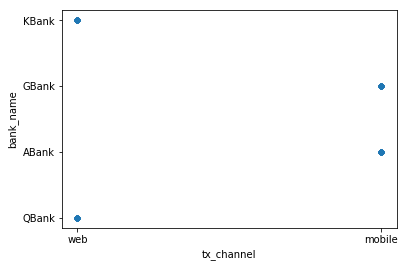

In [28]:
df5.plot(x='tx_channel',y='bank_name', kind='scatter')

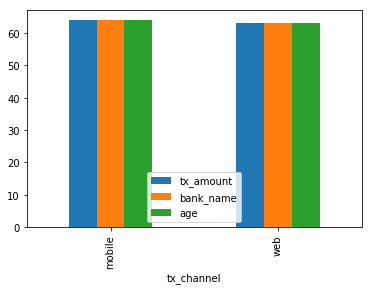

In [29]:
df5.groupby('tx_channel').count().plot(kind='bar')